In [4]:
import glob
import re
from math import sqrt

from matplotlib import pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from collections import OrderedDict

from utils import Graph

def hit_check(x, y, z, tip_size):
    h = x * 1e-6
    r = sqrt(y**2 + z**2) * 1e-6
    
    if (h - 3.5e-3)**2 + r**2 <= tip_size**2:
        return True
    
    if h <= 3.5e-3 and h <= (3e-3 - 3.5e-3) / (1e-4 - tip_size) * (r - 1e-4) + 3e-3:
        return True
    
    return False

In [5]:
file_tree = {}

for file in glob.glob('transverse-amplification/*.txt'):
    key = int(re.search(r'(\d*)(?:V)', file).group(1))
    if (key in file_tree):
        file_tree[key].append(file)
    else:
        file_tree[key] = [file]

rings = np.linspace(0, 1000, 101)
mults = []

num_hits = 0

for key, value in sorted(file_tree.items()):
    group = Graph(value, smooth=False)
    
    for i in range(group.n):
        if hit_check(group.x[i][-1], group.y[i][-1], group.z[i][-1], 1e-6):
            num_hits += 1
            
    print(group.n, num_hits)

    for i in range(len(rings) - 1):
        ionization_list = []
        for k in range(group.n):
            if (group.y[k][0]**2 + group.z[k][0]**2) < rings[i + 1]**2 and (group.y[k][0]**2 + group.z[k][0]**2) > rings[i]:
                ionization_list.append(group.ionized[k][-1])
        if len(ionization_list) > 0:
            mults.append(2**np.mean(ionization_list))
        else:
            mults.append(1)

6519 4648


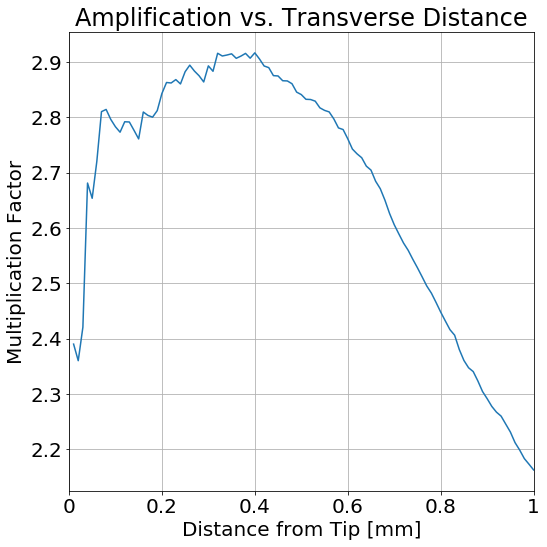

In [10]:
plt.rcParams['font.size'] = 20
plt.rcParams['font.family'] = 'sans-serif'
fig = plt.figure(figsize=(8, 8))

plt.plot(rings[1:], mults)

plt.xlabel('Distance from Tip [mm]')
plt.ylabel('Multiplication Factor')
plt.title('Amplification vs. Transverse Distance')

plt.xlim(0, 1000)

plt.gca().set_xticklabels([0, 0.2, 0.4, 0.6, 0.8, 1])

plt.grid()
plt.tight_layout()
# plt.show()

plt.savefig(f'transverse_amp.pdf', bbox_inches='tight')